# Titanic Passenger Survival Prediction

## Project Overview

This project focuses on predicting whether a passenger survived the sinking of the Titanic based on various features like ticket class, age, gender, and family relations aboard the ship. The dataset provides detailed information about each passenger, enabling the use of classification models to predict survival outcomes. This project demonstrates the use of machine learning classification techniques on one of the most famous datasets in the field of data science.

## Data Source

This dataset is available on Kaggle in the following link:

> https://www.kaggle.com/competitions/titanic/data

## Dataset Description

The dataset contains the following columns:

- **passengerid**: A unique identification number for each passenger.
- **survived**: Survival (0 = No, 1 = Yes)
- **Nmae**: Name of each passenger.
- **pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sex**: Gender of the passenger
- **age**: Age of the passenger in years
- **sibsp**: Number of siblings/spouses aboard the Titanic
- **parch**: Number of parents/children aboard the Titanic
- **ticket**: Ticket number
- **fare**: Passenger fare
- **cabin**: Cabin number
- **embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Variable Notes

- **pclass**: A proxy for socio-economic status (SES)
  - 1st = Upper class
  - 2nd = Middle class
  - 3rd = Lower class

- **age**: Age is fractional if less than 1. If the age is estimated, it is in the form of `xx.5`.

- **sibsp**: Number of siblings/spouses aboard the Titanic.
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)

- **parch**: Number of parents/children aboard the Titanic.
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children traveled only with a nanny, therefore `parch=0` for them.

## Problem Statement

The objective of this assignment is to perform an in-depth Exploratory Data Analysis on the Titanic dataset, uncovering insights, patterns, and relationships within the data. Through this analysis, we will gain familiarity with various EDA techniques and derive meaningful conclusions from the dataset.


### Load Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from scipy.stats import chi2_contingency, f_oneway

### Settings

In [2]:
# Warnings
warnings.filterwarnings("ignore")

# Plot
sns.set_style("darkgrid")

# Dataframe
pd.set_option("display.max_columns", None)

# Path
data_path = "../data"
csv_path = os.path.join(data_path, "train.csv")

### Load Data

In [3]:
df = pd.read_csv(csv_path)

In [4]:
# Show 1st 5 observations to get an idea about the data stored in each feature
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Understanding

In [5]:
# Data Description
def data_desc():
    print("=" * 60)
    print("DATA DESCRIPTION")
    print("=" * 60)
    print(f"Number of observations: {df.shape[0]}")
    print(f"Number of features: {df.shape[1]}")

# Describe data
data_desc()

DATA DESCRIPTION
Number of observations: 891
Number of features: 12


In [6]:
# Feature Description
def feature_desc():
    print("=" * 60)
    print("FEATURE DESCRIPTION")
    print("=" * 60)
    print(df.dtypes)
    print("-" * 60)
    num_cols= [col for col in df.columns if df[col].dtype != "object"]
    cat_cols= [col for col in df.columns if df[col].dtype == "object"]
    print(f"Number of Numeric features: {len(num_cols)}")
    print(num_cols)
    print("-" * 60)
    print(f"Number of Categorical features: {len(cat_cols)}")
    print(cat_cols)

# Describe features
feature_desc()

FEATURE DESCRIPTION
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
------------------------------------------------------------
Number of Numeric features: 7
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
------------------------------------------------------------
Number of Categorical features: 5
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [7]:
# Missing Value Detection
def check_missing():
    print("=" * 60)
    print("MISSING VALUE DETECTION")
    print("=" * 60)
    if df.isnull().sum().sum() >0:
        print(df.isnull().sum().sort_values(ascending= False))
    else:
        print("No missing value present in any feature.")

check_missing()

MISSING VALUE DETECTION
Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


### Key Findings

- **Cabin** feature has **77%** missing values. It is not recomended to impute this huge percentage of values with any other value. So, this feature should be dropped.
- **Age** feature has **20%** missing values. It is recommended to impute this values with mean age.
- **Embarked** feature has only **2** missing values. This should imputed with most frequent emabarksion value.

In [8]:
# Duplicate observation detection
def check_duplicate():
    print("=" * 60)
    print("DUPLICATE OBSERVATION DETECTION")
    print("=" * 60)
    print(f"Number of duplicate observations: {df.duplicated().sum()}")

check_duplicate()

DUPLICATE OBSERVATION DETECTION
Number of duplicate observations: 0


### Data Cleancing

In [9]:
# Drop the Cabin feature
df.drop("Cabin", axis= 1, inplace = True)

# Sanity check
check_missing()

MISSING VALUE DETECTION
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


In [10]:
# Impute the Age by the median in gender to preserve the distribution
df["Age"].fillna(df.groupby("Sex")["Age"].transform(lambda x: x.median()), inplace= True)

# Sanity check
check_missing()

MISSING VALUE DETECTION
Embarked       2
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64


In [11]:
# Impute embarked with most frequent(mode) value
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace= True)

# Sanity check
check_missing()

MISSING VALUE DETECTION
No missing value present in any feature.


In [12]:
# Data Description
data_desc()

DATA DESCRIPTION
Number of observations: 891
Number of features: 11


### Passenger Demographic Analysis

#### Analyze the distribution of passengers by gender, age, and passenger class (Pclass).

GENDER DISTRIBUTION
Sex
male      577
female    314
Name: count, dtype: int64


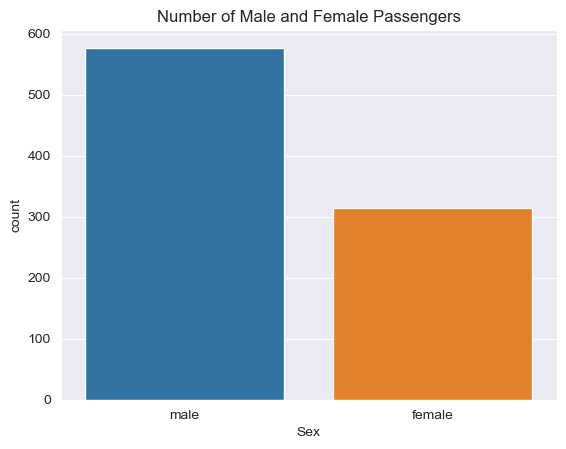

In [13]:
# Gender Distribution
print("=" * 60)
print("GENDER DISTRIBUTION")
print("=" * 60)
print(df["Sex"].value_counts())

# Visualize Distribution
sns.countplot(data= df, x= "Sex", hue= "Sex")
plt.title("Number of Male and Female Passengers")
plt.show()

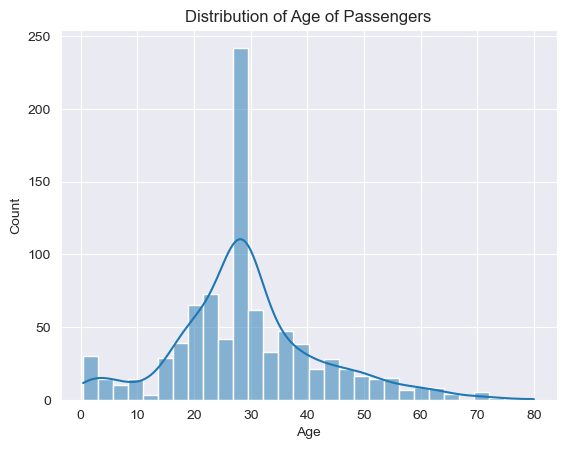

In [14]:
# Age Distribution
sns.histplot(data= df, x= "Age", kde= True)
plt.title("Distribution of Age of Passengers")
plt.show()

PASSENGER CLASS DISTRIBUTION
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


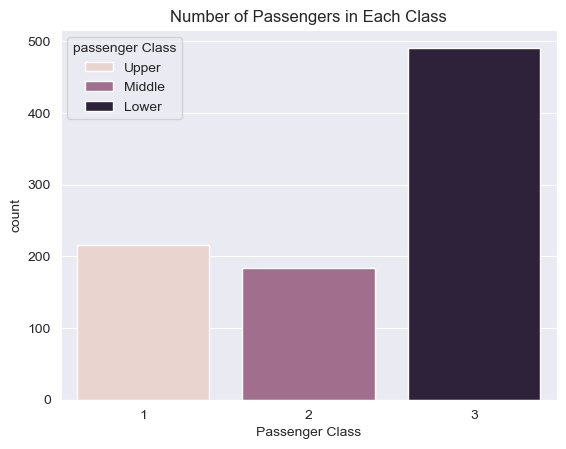

In [15]:
# Passenger Class Distribution
print("=" * 60)
print("PASSENGER CLASS DISTRIBUTION")
print("=" * 60)
print(df["Pclass"].value_counts())

# Visualize Distribution
sns.countplot(data= df, x= "Pclass", hue= "Pclass")
plt.title("Number of Passengers in Each Class")
plt.xlabel("Passenger Class")
plt.legend(title= "passenger Class", labels= {"Upper": 1, "Middle": 2, "Lower": 3})
plt.show()

### Key Findings

- Number of **male** passengers are more than the number of **female** passengers.
- Age of most of the passengers varies from **20- 40 years**. Highest number of passengers having age of **30 years**. Most of the passengers are **young adults**.
- Most of the passenger have **Lower** calss.

#### What are the top embarkation ports (Embarked), and what percentage of passengers boarded from each?

EBARKTION PORT ANALYSIS
  Embarked  percentage Embarked_full
0        S       72.50   Southampton
1        C       18.86     Cherbourg
2        Q        8.64    Queenstown


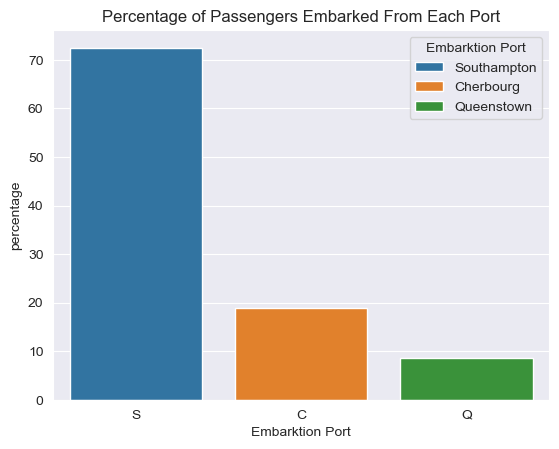

In [16]:
# Embarktion Port Analysis

# Calculate Percentage of passengers from each port
embarked_passengers = df["Embarked"].value_counts(normalize= True).reset_index()
embarked_passengers["percentage"] = np.round(embarked_passengers["proportion"] * 100, 2)
# Assign Full Name of Embarktion Port
embarked_passengers["Embarked_full"] = embarked_passengers["Embarked"].map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
embarked_passengers.drop(columns= [ "proportion"], axis= 1, inplace= True)
print("=" * 60)
print("EBARKTION PORT ANALYSIS")
print("=" * 60)
print(embarked_passengers)

# Visualize Distribution
sns.barplot(data= embarked_passengers, x= "Embarked", y= "percentage", hue= "Embarked_full")
plt.title("Percentage of Passengers Embarked From Each Port")
plt.xlabel("Embarktion Port")
plt.legend(title= "Embarktion Port")
plt.show()

### Key Findings

- Most(**72.5%**) of passengers had been embarked from the port **Southampton**.

### Survival Analysis

#### What percentage of passengers survived, and what percentage did not?

SURVIVAL RATE
   Survived  proportion  percentage      Survival
0         0    0.616162   61.616162  Not Survived
1         1    0.383838   38.383838      Survived


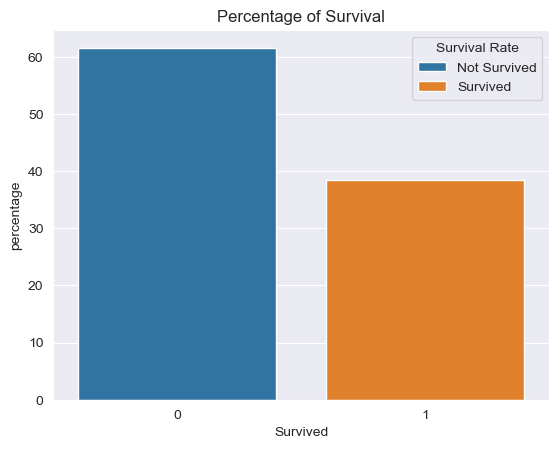

In [17]:
# Calculate the passenger survival percentage
survival_rate = df["Survived"].value_counts(normalize= True).reset_index()
survival_rate["percentage"] = survival_rate["proportion"] * 100
survival_rate["Survival"] = survival_rate["Survived"].map({1: "Survived",0: "Not Survived"})
print("=" * 60)
print("SURVIVAL RATE")
print("=" * 60)
print(survival_rate)

# Visualize the survival rate
sns.barplot(data= survival_rate, x= "Survived", y= "percentage", hue= "Survival")
plt.title("Percentage of Survival")
plt.legend(title="Survival Rate")
plt.show()

### Key Findings

- Only **38.4%** passengers had been survived. **61.6%** passengers failed fo survived from Titanic.

#### How does survival vary by gender? For example, what percentage of males and females survived?

SURVIVAL RATE OF MALE AND FEMALE
      Sex   Survived
0  female  74.203822
1    male  18.890815


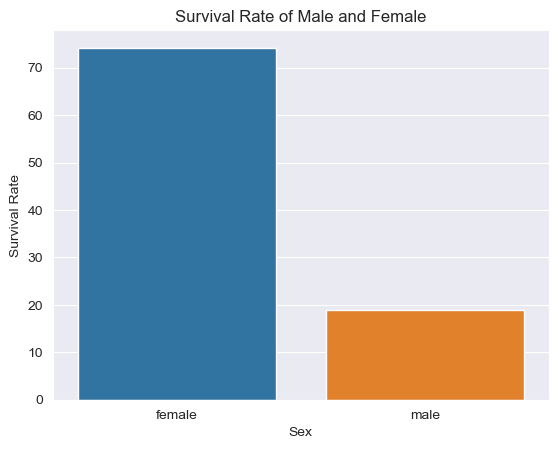

In [18]:
# Calulate the survival rate of male and female 
gender_suvival = df.groupby("Sex")["Survived"].mean().reset_index()
gender_suvival["Survived"] = gender_suvival["Survived"] * 100
print("=" * 60)
print("SURVIVAL RATE OF MALE AND FEMALE")
print("=" * 60)
print(gender_suvival)

# Visualize the Rate of survival for male and female
sns.barplot(data= gender_suvival, x= "Sex", y= "Survived", hue= "Sex")
plt.ylabel("Survival Rate")
plt.title("Survival Rate of Male and Female")
plt.show()

### Key Findings

- Female Survival Rate is much higher(**74.3%**) with respect to the male(**18.9%**) passengers. From this we can say that felames got the first chance of survival.

#### How does survival vary by passenger class (Pclass)? Do first-class passengers have higher survival rates?

SURVIVAL RATE OF PASSENGER CLASS
   Pclass   Survived   Class
0       1  62.962963   Upper
1       2  47.282609  Middle
2       3  24.236253   Lower


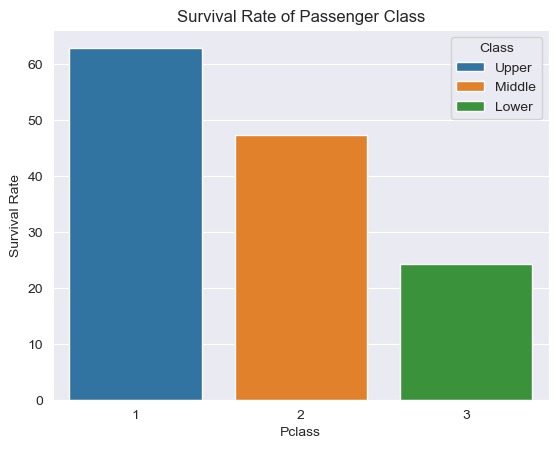

In [19]:
# Calulate the survival rate of passenger class
pclass_suvival = df.groupby("Pclass")["Survived"].mean().reset_index()
pclass_suvival["Survived"] = pclass_suvival["Survived"] * 100
pclass_suvival["Class"] = pclass_suvival["Pclass"].map({1: "Upper", 2: "Middle", 3: "Lower"})
print("=" * 60)
print("SURVIVAL RATE OF PASSENGER CLASS")
print("=" * 60)
print(pclass_suvival)

# Visualize the Rate of survival for male and female
sns.barplot(data= pclass_suvival, x= "Pclass", y= "Survived", hue= "Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate of Passenger Class")
plt.show()

### Key Findings

- Survival rate of Upper Class passengers(**62.9%**) are the highest and Lower Class passengers(**24.2%**) are the lowest.

#### Find the relationship between the Age, Gender and Survival?

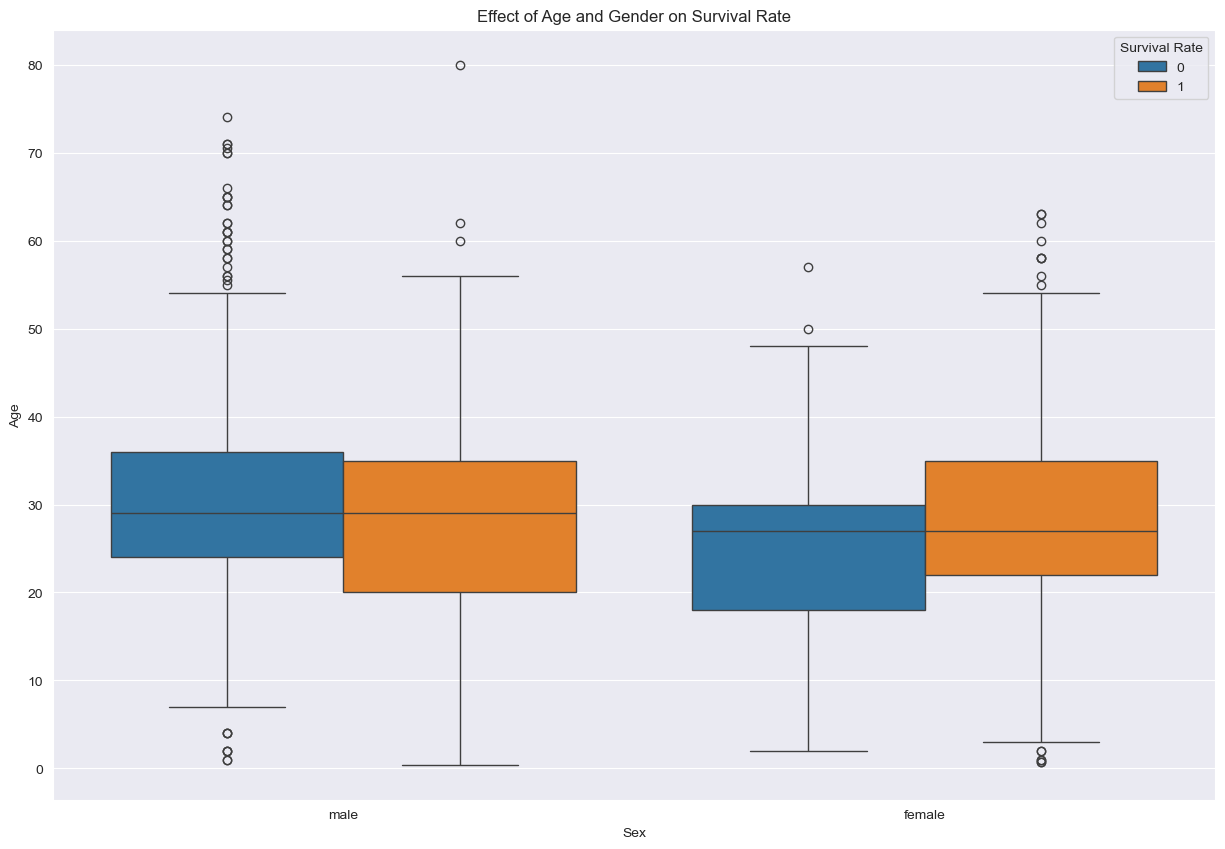

In [23]:
# Visualize the Relationship with boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data= df, x = "Sex", y= "Age", hue= "Survived")
plt.title("Effect of Age and Gender on Survival Rate")
plt.legend(title= "Survival Rate")
plt.show()

### Key Findings

- Most of the **male** survived had the age group **20-35 Years**
- Most of the **female** survived had the age group **22-35 Years**
- Old males and females also had been survived. Childrens had also been survived.

This indicates They trired to save the female, children and oldage people first.

#### Find the Relationship between Passenger Class, Gender and Survival

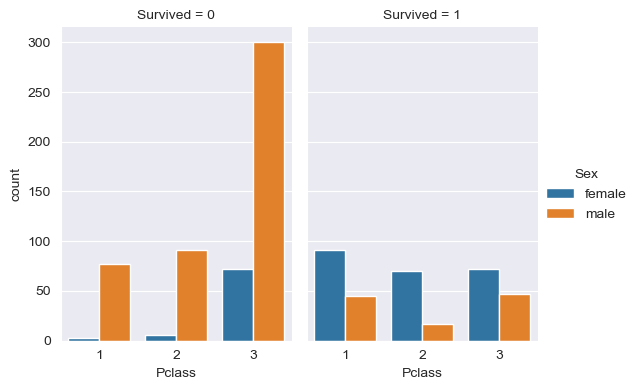

In [25]:
sns.catplot(data= df, x= "Pclass", hue= "Sex", col="Survived", kind= "count", height=4, aspect= 0.7)
# plt.title("Survival Rate of Male and Female for Each Passenger Calss")

### Key Findings

- **Females** of **Upper** class had been survived most.
- **Males** of **Upper** and **Lower** class had been survived most but the rate of survival is lower in all the classes of female.


#### Find the relationship between Age, Class ans Survival

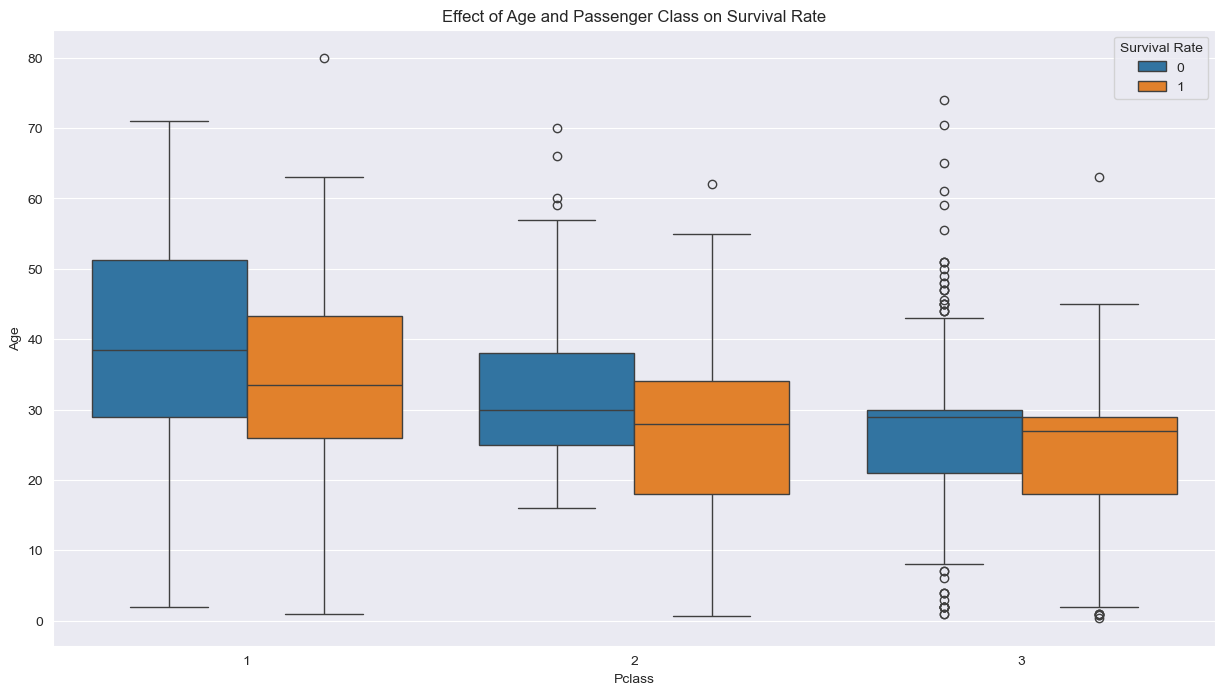

In [27]:
# Visualize the Relationship with boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data= df, x = "Pclass", y= "Age", hue= "Survived")
plt.title("Effect of Age and Passenger Class on Survival Rate")
plt.legend(title= "Survival Rate")
plt.show()

### Key Findings

##### Passenger Class and Age Distribution:

- First-class (Pclass = 1) passengers tend to be older on average compared to those in second (Pclass = 2) and third class (Pclass = 3).
- The age distribution in first class is wider, with several older passengers (above 50 years) compared to the other classes.

#### Survival by Passenger Class:

- Across all classes, survivors (orange boxes) generally tend to be younger than non-survivors (blue boxes).
- This trend is particularly notable in third class, where the median age of survivors is lower than that of non-survivors.

#### Age and Survival:

- In first and second class, the median ages of survivors and non-survivors are closer, although survivors in first class appear slightly younger on average.
- In third class, there’s a clearer age difference, with younger passengers having a higher chance of survival, indicated by the lower median age among survivors compared to non-survivors.

#### Comments

- **Higher chance of survival for younger passengers**, especially in lower classes.
- **Passenger class impacts age distribution**, with older passengers more likely to be in higher classes.

### Family and Group Analysis

#### How many passengers traveled alone versus with family?

ALONE VS FAMILY COUNT
   Alone  count    Passenger
0      1    537        Alone
1      0    354  With Family


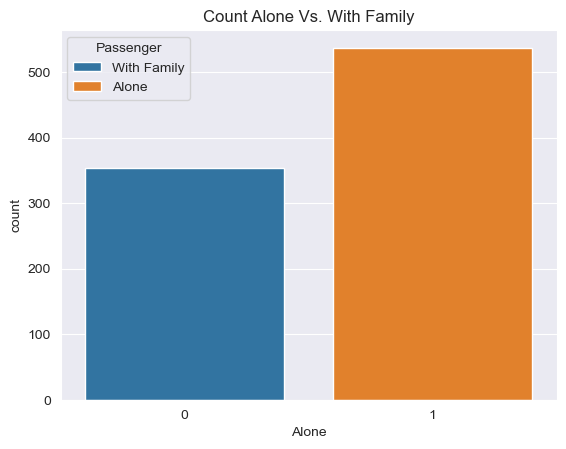

In [28]:
# Define family size with SibSp and Parch
df["FamilySize"] = df["SibSp"]  + df["Parch"] + 1

# Determine the passengers travelling alone
df["Alone"] = df["FamilySize"].apply(lambda x: 1 if x== 1 else 0)

# Calculate number of passengers travel alnoe Vs. With family
alone_falimy_count = df["Alone"].value_counts().reset_index()
alone_falimy_count["Passenger"] = alone_falimy_count["Alone"].map({1: "Alone", 0: "With Family"})
print("=" * 60)
print("ALONE VS FAMILY COUNT")
print("=" * 60)
print(alone_falimy_count)

# Visualize
sns.barplot(data= alone_falimy_count, x= "Alone", y= "count", hue= "Passenger")
plt.title("Count Alone Vs. With Family")
plt.show()

### Key Findings

- Most number of passengers(**537**) were travelling **alone**.

#### Does family size have any relationship with survival rates? Are passengers traveling alone more or less likely to survive?

SURVIVAL RATE FOR FAMILY SIZE
   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000


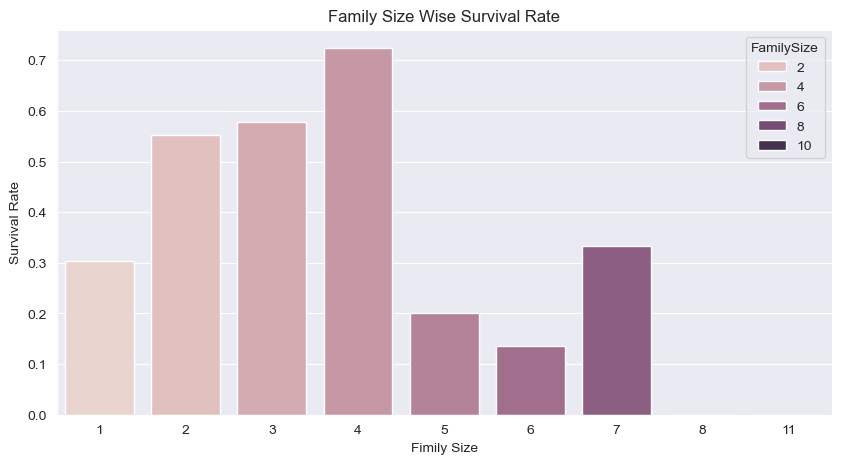

In [32]:
# Calulate survival rate by family size
family_survival_rate = df.groupby("FamilySize")["Survived"].mean().reset_index().sort_values("Survived", ascending= False)
print("=" * 60)
print("SURVIVAL RATE FOR FAMILY SIZE")
print("=" * 60)
print(family_survival_rate)

# Visualize
plt.figure(figsize=(10,5))
sns.barplot(data= family_survival_rate, x = "FamilySize", y= "Survived", hue= "FamilySize")
plt.xlabel("Fimily Size")
plt.ylabel("Survival Rate")
plt.title("Family Size Wise Survival Rate")
plt.show()

SURVIVAL RATE ALONE VS. WITH FAMILY
   Alone  Survived    Passenger
0      0  0.505650  With Family
1      1  0.303538        Alone


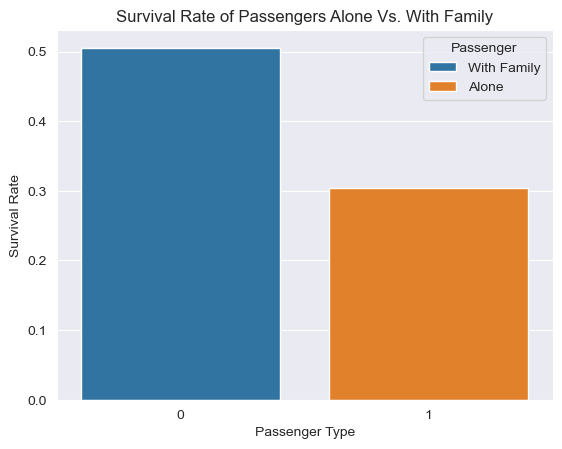

In [34]:
# Calulate survival rate for those who travel alone Vs. with family
alone_survival_rate = df.groupby("Alone")["Survived"].mean().reset_index().sort_values("Survived", ascending= False)
alone_survival_rate["Passenger"] = alone_survival_rate["Alone"].map({1: "Alone", 0: "With Family"})
print("=" * 60)
print("SURVIVAL RATE ALONE VS. WITH FAMILY")
print("=" * 60)
print(alone_survival_rate)

# Visualize
sns.barplot(data= alone_survival_rate, x = "Alone", y= "Survived", hue= "Passenger")
plt.xlabel("Passenger Type")
plt.ylabel("Survival Rate")
plt.title("Survival Rate of Passengers Alone Vs. With Family")
plt.show()

#### Explore the survival rates of children compared to adults. What is the survival rate for children (e.g., those under 18)?

SURVIVAL RATE OF CHILD VS. ADULT
   IsChild  Survived  Group
0        0  0.361183  Adult
1        1  0.539823  Child


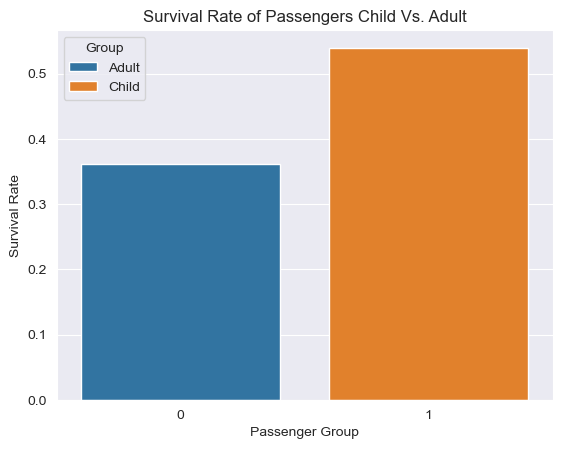

In [35]:
# Determine the if the passenger is child(under 18) or adult
df["IsChild"] = df["Age"].apply(lambda x: 1 if x < 18 else 0)

# Claculate survival rate fo child vs. adult
child_survival_rate = df.groupby("IsChild")["Survived"].mean().reset_index()
child_survival_rate["Group"] = child_survival_rate["IsChild"].map({1: "Child", 0: "Adult"})
print("=" * 60)
print("SURVIVAL RATE OF CHILD VS. ADULT")
print("=" * 60)
print(child_survival_rate)

# Visualize
sns.barplot(data= child_survival_rate, x = "IsChild", y= "Survived", hue= "Group")
plt.xlabel("Passenger Group")
plt.ylabel("Survival Rate")
plt.title("Survival Rate of Passengers Child Vs. Adult")
plt.show()

### Key Findings

- **Alone vs. Family:** Passengers traveling alone had a **lower** survival rate compared to those with family members.
- **Family Size:** Very large families (5 or more) had lower survival rates, while smaller family groups (2-4) had a slight survival advantage.
- **Children vs. Adults:** Children under 18 had a **higher** survival rate than adults, likely due to the **“women and children first”** policy.

### Correlation Analysis

            Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.338481 -0.073296 -0.035322  0.081629  0.257307   
Pclass     -0.338481  1.000000 -0.338056  0.083081  0.018443 -0.549500   
Age        -0.073296 -0.338056  1.000000 -0.236376 -0.176038  0.094161   
SibSp      -0.035322  0.083081 -0.236376  1.000000  0.414838  0.159651   
Parch       0.081629  0.018443 -0.176038  0.414838  1.000000  0.216225   
Fare        0.257307 -0.549500  0.094161  0.159651  0.216225  1.000000   
FamilySize  0.016639  0.065997 -0.249501  0.890712  0.783111  0.217138   

            FamilySize  
Survived      0.016639  
Pclass        0.065997  
Age          -0.249501  
SibSp         0.890712  
Parch         0.783111  
Fare          0.217138  
FamilySize    1.000000  


<Axes: >

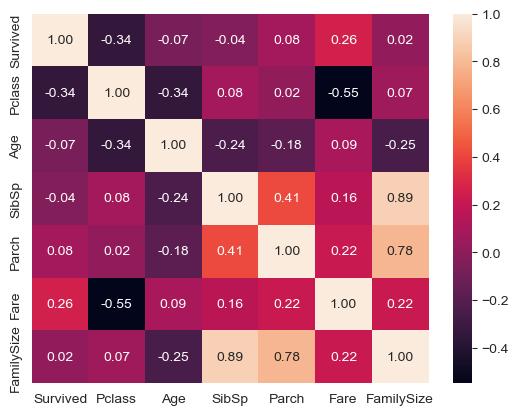

In [43]:
# Get the numeric features
num_cols= ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
# Find correlation matrix
corr = df[num_cols].corr()
print(corr)
# Visualize with heatmap for better understanding
sns.heatmap(corr, annot= True, fmt= "0.2f")

### Key Findings

#### Survival (Survived) Correlation:

- Pclass has a moderate negative correlation with Survived **(-0.34)**, indicating that passengers in lower classes (higher Pclass values) were less likely to survive.
- Fare has a moderate positive correlation with Survived **(0.26)**, suggesting that passengers who paid higher fares were more likely to survive. This aligns with the trend of higher survival rates in first class.
- Other variables like SibSp, Parch, and FamilySize show weaker positive correlations with Survived **(close to 0.08)**, indicating a slight survival advantage for those traveling with family members.

#### Family-Related Variables:

- SibSp and Parch show a moderate positive correlation **(0.41)**, as expected since they both measure the presence of family members.
- FamilySize is highly correlated with both SibSp **(0.89)** and Parch **(0.78)**, as it is derived from these variables.

#### Fare and Pclass:

- There is a strong negative correlation between Fare and Pclass **(-0.55)**. This indicates that passengers in lower classes generally paid less for their tickets, which aligns with the class system.

#### Comments

- Passengers in higher classes (lower Pclass) and those who paid higher fares had better survival rates, reflecting the prioritization of first-class passengers during rescue operations.
- Traveling with family members (moderate SibSp and Parch) slightly improved survival odds, likely because families tended to stay together during evacuation.
- Larger families or high FamilySize values might reduce survival chances as lifeboat access becomes challenging for bigger groups.

### Hypothesis Testing

#### Women and Children Priority:

- **Hypothesis:** Women and children had a higher likelihood of survival because of the "women and children first" protocol.
- **Supporting Evidence:** Gender shows a strong association with survival, and children had a significantly higher survival rate than adults.

##### Chi2 Test for Independence

> **H0**: Women had not higher survival rate.

> **H1**: Women had higher survival rate.

In [46]:
gender_table = pd.crosstab(df['Sex'], df["Survived"])
chi2_gender, p_gender,_, _ = chi2_contingency(gender_table)
if p_gender < 0.05:
    print("Women had higher survival rate.")
else: 
    print("Women had not higher survival rate.")

Women had higher survival rate.


##### Chi2 Test for Independence

> **H0**: Children had not been survived more than adults.

> **H1**: Children had been survived more than adults.

In [47]:
child_table = pd.crosstab(df["IsChild"], df["Survived"])
chi2_child, p_child,_,_ = chi2_contingency(child_table)
if p_child < 0.05:
    print("Children had been survived more than adults.")
else:
    print("Children had not been survived more than adults.")

Children had been survived more than adults.


### Insights from Analysis

From the analysis (including correlation matrix, survival breakdowns, and visualizations):

- **Gender (Sex):** Women had a significantly higher survival rate compared to men. The "women and children first" policy likely influenced this.
- **Age:** Children (under 18) had higher survival rates compared to adults, reflecting prioritization in evacuation efforts.
- **Passenger Class (Pclass):** First-class passengers were more likely to survive due to better access to lifeboats and preferential treatment.
- **Fare:** Higher fare-paying passengers had better survival chances, likely correlating with their access to first-class amenities and proximity to lifeboats.
- **Family Size:** Small family groups (2–4 members) had slightly better survival rates, while larger families struggled to secure lifeboats.
- **Traveling Alone:** Passengers traveling alone (FamilySize = 1) had lower survival rates compared to those traveling with family.

### Suggestions for Titanic Crew Improvements

Based on the insights from the data, the Titanic crew could have improved survival rates by addressing the following:

#### Better Lifeboat Access for Lower Classes:

The crew could have ensured equal access to lifeboats for passengers in all classes, particularly third-class passengers who had limited access due to physical barriers (locked gates, etc.).

#### Increased Lifeboat Capacity:

The Titanic famously lacked lifeboat capacity for all passengers. Carrying enough lifeboats for everyone onboard would have significantly increased survival rates.

#### Improved Evacuation Procedures:

Implementing structured and organized evacuation plans could have reduced chaos and ensured fair lifeboat allocation, especially for larger families and children.

#### Education and Drills:

Conducting evacuation drills and educating passengers on safety protocols could have minimized confusion and improved survival chances for those in lower classes.

#### Prioritization Based on Risk:

Explicitly prioritizing children and small family groups over individuals or large families might have further optimized survival outcomes.